<a href="https://colab.research.google.com/github/NaraaBold/DiverNaraa/blob/main/promise_from_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Preprocessing]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#import data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fault_detection/PROMISE-unified-class-csv.csv')

print (data.shape)
print(data)

(15521, 81)
             CC  CCL  CCO  CI       CLC      CLLC  LDC  LLDC  LCOM5  NL  ...  \
0      0.075055    1    4   2  0.044543  0.069565   20    16      1   5  ...   
1      0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
2      0.000000    0    0   0  0.000000  0.000000    0     0      1   1  ...   
3      0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
4      0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
...         ...  ...  ...  ..       ...       ...  ...   ...    ...  ..  ...   
15516  0.000000    0    0   0  0.000000  0.000000    0     0      1   3  ...   
15517  0.000000    0    0   0  0.000000  0.000000    0     0      1   1  ...   
15518  0.000000    0    0   0  0.000000  0.000000    0     0      5   1  ...   
15519  0.000000    0    0   0  0.000000  0.000000    0     0      4   1  ...   
15520  0.000000    0    0   0  0.000000  0.000000    0     0      1   3  ...   

            dam  moa       

In [ ]:
data.groupby('bug').size()

bug
False    9932
True     5589
dtype: int64

In [ ]:
#Changing label to 0, 1
data["bug"] = data["bug"].astype(int)
print (data)

             CC  CCL  CCO  CI       CLC      CLLC  LDC  LLDC  LCOM5  NL  ...  \
0      0.075055    1    4   2  0.044543  0.069565   20    16      1   5  ...   
1      0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
2      0.000000    0    0   0  0.000000  0.000000    0     0      1   1  ...   
3      0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
4      0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
...         ...  ...  ...  ..       ...       ...  ...   ...    ...  ..  ...   
15516  0.000000    0    0   0  0.000000  0.000000    0     0      1   3  ...   
15517  0.000000    0    0   0  0.000000  0.000000    0     0      1   1  ...   
15518  0.000000    0    0   0  0.000000  0.000000    0     0      5   1  ...   
15519  0.000000    0    0   0  0.000000  0.000000    0     0      4   1  ...   
15520  0.000000    0    0   0  0.000000  0.000000    0     0      1   3  ...   

            dam  moa       mfa       ca

In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
print (X.shape)
Y = data.iloc[:,-1]
print (Y.shape)

#splitting dataset into 75% training set and 25% testing set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print (X_train.shape)
print (y_train.shape)

(15521, 80)
(15521,)
(11640, 80)
(11640,)


In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print (X_train)
scaler.fit(X_train)
#transform both X_train and X_test
X_train_standard= scaler.transform(X_train)
X_test_standard= scaler.transform(X_test)
print (X_train_standard)

             CC  CCL  CCO  CI       CLC      CLLC  LDC  LLDC  LCOM5  NL  ...  \
7960   0.000000    0    0   0  0.000000  0.000000    0     0      1   2  ...   
15368  0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
7065   0.000000    0    0   0  0.000000  0.000000    0     0      1   1  ...   
8722   0.432034    3   14   3  0.291553  0.387097  107    96      2   8  ...   
9988   0.367816    2    6   2  0.277778  0.307692   15    12      1   1  ...   
...         ...  ...  ...  ..       ...       ...  ...   ...    ...  ..  ...   
5191   0.000000    0    0   0  0.000000  0.000000    0     0      0   0  ...   
13418  0.000000    0    0   0  0.000000  0.000000    0     0      2   4  ...   
5390   0.051780    1    8   2  0.032909  0.040816   31    24      2   4  ...   
860    0.000000    0    0   0  0.000000  0.000000    0     0      1   5  ...   
7270   0.000000    0    0   0  0.000000  0.000000    0     0      1   0  ...   

        loc  dam  moa       mfa       c

[Learning and Estimation]

[KNN]

In [ ]:
#Training
from sklearn.neighbors import KNeighborsClassifier
# nn  = 5
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5.fit(X_train_standard, y_train)
prediction_5 = neigh_5.predict(X_test_standard)

# nn  = 3
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X_train_standard, y_train)
prediction_3 = neigh_3.predict(X_test_standard)

In [ ]:
# Calculate 4 types of indicators using scikit-learn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Evaluation result for nn=5 classifier
# Accuracy classification score.
accuracy_5 = accuracy_score(y_test, prediction_5)
# Compute precision. The precision is the ratio tp / (tp + fp). The best value is 1 and the worst value is 0.
precision_5 = precision_score(y_test, prediction_5, average='macro')
#Compute recall. The recall is the ratio tp / (tp + fn). The best value is 1 and the worst value is 0.
recall_5 = recall_score(y_test, prediction_5, average='macro')
# The F1 score can be interpreted as a harmonic mean of the precision and recall. best value at 1 and worst score at 0
f1_5 = f1_score(y_test, prediction_5, average='macro')

# Evaluation result for nn=3 classifier
accuracy_3 = accuracy_score(y_test, prediction_3)
precision_3 = precision_score(y_test, prediction_3, average='macro')
recall_3 = recall_score(y_test, prediction_3, average='macro')
f1_3 = f1_score(y_test, prediction_3, average='macro')

d = {'accuracy':[accuracy_5, accuracy_3], 'precision':[precision_5, precision_3], 'recall':[recall_5, recall_3], 'F1 score': [f1_5, f1_3]}
evaluation_table = pd.DataFrame(data=d, index=['nn=5', 'nn=3'])
print (evaluation_table)

      accuracy  precision    recall  F1 score
nn=5  0.696728   0.667755  0.648115  0.652979
nn=3  0.688740   0.658322  0.644833  0.648786


[Logistic regression]

In [ ]:
# Logistic regression tuning hyperparameters

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold


# logistic regression classifier
model_logistic = LogisticRegression(C = 10, solver = 'newton-cg').fit(X_train_standard, y_train)
prediction_LR = model_logistic.predict(X_test_standard)

#calculate evaluation metrics and add to evaluation_table
def calculate_metrics_add_to_table (prediction_result, model_name, table_name):
  d = {'accuracy':[accuracy_score(y_test, prediction_result)], 'precision':[precision_score(y_test, prediction_result, average='macro')], 'recall':[recall_score(y_test, prediction_result, average='macro')], 'F1 score': [f1_score(y_test, prediction_result, average='macro')]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)

evaluation_table = calculate_metrics_add_to_table(prediction_LR, 'LR', evaluation_table)

print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5  0.696728   0.667755  0.648115  0.652979
nn=3  0.688740   0.658322  0.644833  0.648786
LR    0.694666   0.681365  0.611571  0.608831


<ipython-input-9-82aade6d6363>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return table_name.append(evaluation_result)


[SVM]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

# SVM model tuning
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [0.01]
gamma = [10]
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

KeyboardInterrupt: ignored

In [ ]:
# SVM classifier
# SVM model tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold


kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for gamma_item in gamma:
  for c_item in C:
    for kernel_item in kernel:
      model_SVC = SVC(C=c_item, gamma=gamma_item, kernel = kernel_item).fit(X_train_standard, y_train)
      prediction_SVC = model_SVC.predict(X_test_standard)
      evaluation_table = calculate_metrics_add_to_table(prediction_SVC, 'SVC_' + str(c_item) + '_'+str(gamma_item) +'_' + kernel_item, evaluation_table)
      print(evaluation_table)

                    accuracy  precision    recall  F1 score
nn=5                0.696728   0.667831  0.646712  0.651657
nn=3                0.687967   0.657415  0.644073  0.647982
LR                  0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly  0.642103   0.726949  0.504042  0.399766
                    accuracy  precision    recall  F1 score
nn=5                0.696728   0.667831  0.646712  0.651657
nn=3                0.687967   0.657415  0.644073  0.647982
LR                  0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly  0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf   0.684875   0.695704  0.581928  0.560932
                       accuracy  precision    recall  F1 score
nn=5                   0.696728   0.667831  0.646712  0.651657
nn=3                   0.687967   0.657415  0.644073  0.647982
LR                     0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly     0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf      0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                       accuracy  precision    recall  F1 score
nn=5                   0.696728   0.667831  0.646712  0.651657
nn=3                   0.687967   0.657415  0.644073  0.647982
LR                     0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly     0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf      0.684875   0.695704  0.581928  0.560932
SVC_50_0.0001_sigmoid  0.684102   0.702690  0.578204  0.553496
SVC_10_0.0001_poly     0.639784   0.653215  0.500513  0.391521
SVC_10_0.0001_rbf      0.681268   0.707672  0.571622  0.541271
SVC_10_0.0001_sigmoid  0.675599   0.706624  0.561576  0.523231
SVC_1.0_0.0001_poly    0.639526   0.319763  0.500000  0.390068
                       accuracy  precision    recall  F1 score
nn=5                   0.696728   0.667831  0.646712  0.651657
nn=3                   0.687967   0.657415  0.644073  0.647982
LR                     0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly     0.642103   0.726949  0.504042  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        accuracy  precision    recall  F1 score
nn=5                    0.696728   0.667831  0.646712  0.651657
nn=3                    0.687967   0.657415  0.644073  0.647982
LR                      0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly      0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf       0.684875   0.695704  0.581928  0.560932
SVC_50_0.0001_sigmoid   0.684102   0.702690  0.578204  0.553496
SVC_10_0.0001_poly      0.639784   0.653215  0.500513  0.391521
SVC_10_0.0001_rbf       0.681268   0.707672  0.571622  0.541271
SVC_10_0.0001_sigmoid   0.675599   0.706624  0.561576  0.523231
SVC_1.0_0.0001_poly     0.639526   0.319763  0.500000  0.390068
SVC_1.0_0.0001_rbf      0.664777   0.697094  0.543758  0.489991
SVC_1.0_0.0001_sigmoid  0.658078   0.697392  0.531815  0.464867
SVC_0.1_0.0001_poly     0.639526   0.319763  0.500000  0.390068
                        accuracy  precision    recall  F1 score
nn=5                    0.696728   0.667

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        accuracy  precision    recall  F1 score
nn=5                    0.696728   0.667831  0.646712  0.651657
nn=3                    0.687967   0.657415  0.644073  0.647982
LR                      0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly      0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf       0.684875   0.695704  0.581928  0.560932
SVC_50_0.0001_sigmoid   0.684102   0.702690  0.578204  0.553496
SVC_10_0.0001_poly      0.639784   0.653215  0.500513  0.391521
SVC_10_0.0001_rbf       0.681268   0.707672  0.571622  0.541271
SVC_10_0.0001_sigmoid   0.675599   0.706624  0.561576  0.523231
SVC_1.0_0.0001_poly     0.639526   0.319763  0.500000  0.390068
SVC_1.0_0.0001_rbf      0.664777   0.697094  0.543758  0.489991
SVC_1.0_0.0001_sigmoid  0.658078   0.697392  0.531815  0.464867
SVC_0.1_0.0001_poly     0.639526   0.319763  0.500000  0.390068
SVC_0.1_0.0001_rbf      0.648029   0.734611  0.513198  0.420759
SVC_0.1_0.0001_sigmoid  0.641072   0.677

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        accuracy  precision    recall  F1 score
nn=5                    0.696728   0.667831  0.646712  0.651657
nn=3                    0.687967   0.657415  0.644073  0.647982
LR                      0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly      0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf       0.684875   0.695704  0.581928  0.560932
SVC_50_0.0001_sigmoid   0.684102   0.702690  0.578204  0.553496
SVC_10_0.0001_poly      0.639784   0.653215  0.500513  0.391521
SVC_10_0.0001_rbf       0.681268   0.707672  0.571622  0.541271
SVC_10_0.0001_sigmoid   0.675599   0.706624  0.561576  0.523231
SVC_1.0_0.0001_poly     0.639526   0.319763  0.500000  0.390068
SVC_1.0_0.0001_rbf      0.664777   0.697094  0.543758  0.489991
SVC_1.0_0.0001_sigmoid  0.658078   0.697392  0.531815  0.464867
SVC_0.1_0.0001_poly     0.639526   0.319763  0.500000  0.390068
SVC_0.1_0.0001_rbf      0.648029   0.734611  0.513198  0.420759
SVC_0.1_0.0001_sigmoid  0.641072   0.677

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                         accuracy  precision    recall  F1 score
nn=5                     0.696728   0.667831  0.646712  0.651657
nn=3                     0.687967   0.657415  0.644073  0.647982
LR                       0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly       0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf        0.684875   0.695704  0.581928  0.560932
SVC_50_0.0001_sigmoid    0.684102   0.702690  0.578204  0.553496
SVC_10_0.0001_poly       0.639784   0.653215  0.500513  0.391521
SVC_10_0.0001_rbf        0.681268   0.707672  0.571622  0.541271
SVC_10_0.0001_sigmoid    0.675599   0.706624  0.561576  0.523231
SVC_1.0_0.0001_poly      0.639526   0.319763  0.500000  0.390068
SVC_1.0_0.0001_rbf       0.664777   0.697094  0.543758  0.489991
SVC_1.0_0.0001_sigmoid   0.658078   0.697392  0.531815  0.464867
SVC_0.1_0.0001_poly      0.639526   0.319763  0.500000  0.390068
SVC_0.1_0.0001_rbf       0.648029   0.734611  0.513198  0.420759
SVC_0.1_0.0001_sigmoid   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                     accuracy  precision    recall  F1 score
nn=5                 0.696728   0.667831  0.646712  0.651657
nn=3                 0.687967   0.657415  0.644073  0.647982
LR                   0.694666   0.681365  0.611571  0.608831
SVC_50_0.0001_poly   0.642103   0.726949  0.504042  0.399766
SVC_50_0.0001_rbf    0.684875   0.695704  0.581928  0.560932
...                       ...        ...       ...       ...
SVC_0.1_0.1_poly     0.717599   0.705805  0.648370  0.653898
SVC_0.1_0.1_rbf      0.670188   0.726868  0.549236  0.497068
SVC_0.1_0.1_sigmoid  0.560423   0.522877  0.522834  0.522854
SVC_0.01_0.1_poly    0.699562   0.708264  0.606354  0.597683
SVC_0.01_0.1_rbf     0.639526   0.319763  0.500000  0.390068

[62 rows x 4 columns]
                      accuracy  precision    recall  F1 score
nn=5                  0.696728   0.667831  0.646712  0.651657
nn=3                  0.687967   0.657415  0.644073  0.647982
LR                    0.694666   0.681365  0.611571  0.6088

In [ ]:
# SVM classifier
# SVM model tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold


kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = [1, 10]

for gamma_item in gamma:
  for c_item in C:
    for kernel_item in kernel:
      model_SVC = SVC(C=c_item, gamma=gamma_item, kernel = kernel_item).fit(X_train_standard, y_train)
      prediction_SVC = model_SVC.predict(X_test_standard)
      evaluation_table = calculate_metrics_add_to_table(prediction_SVC, 'SVC_' + str(c_item) + '_'+str(gamma_item) +'_' + kernel_item, evaluation_table)
      print(evaluation_table)

In [ ]:
from sklearn.svm import SVC

# SVM classifier
model_SVC = SVC(C=10, gamma=0.01, kernel = 'rbf').fit(X_train_standard, y_train)
prediction_SVC = model_SVC.predict(X_test_standard)

evaluation_table = calculate_metrics_add_to_table(prediction_SVC, 'SVC', evaluation_table)
print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5  0.696728   0.667755  0.648115  0.652979
nn=3  0.688740   0.658322  0.644833  0.648786
LR    0.694666   0.681365  0.611571  0.608831
SVC   0.724298   0.712272  0.659222  0.666211


Decision tree

In [ ]:
# Decision tuning hyperparameters
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import tree

# define models and parameters
model = tree.DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
# define grid search
grid = dict(criterion=criterion, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.703923 using {'criterion': 'gini', 'max_depth': 8}
0.677606 (0.016005) with: {'criterion': 'gini', 'max_depth': 2}
0.694158 (0.012513) with: {'criterion': 'gini', 'max_depth': 4}
0.700430 (0.008649) with: {'criterion': 'gini', 'max_depth': 6}
0.703923 (0.011392) with: {'criterion': 'gini', 'max_depth': 8}
0.701919 (0.012649) with: {'criterion': 'gini', 'max_depth': 10}
0.702262 (0.014173) with: {'criterion': 'gini', 'max_depth': 12}
0.687572 (0.015109) with: {'criterion': 'entropy', 'max_depth': 2}
0.693184 (0.014464) with: {'criterion': 'entropy', 'max_depth': 4}
0.696535 (0.010621) with: {'criterion': 'entropy', 'max_depth': 6}
0.700315 (0.011195) with: {'criterion': 'entropy', 'max_depth': 8}
0.701346 (0.008592) with: {'criterion': 'entropy', 'max_depth': 10}
0.703121 (0.010612) with: {'criterion': 'entropy', 'max_depth': 12}


In [ ]:
# Decision tree classifier
model_DT = tree.DecisionTreeClassifier(criterion='gini', max_depth=8).fit(X_train_standard, y_train)
prediction_DT = model_DT.predict(X_test_standard)

evaluation_table = calculate_metrics_add_to_table(prediction_DT, 'DT', evaluation_table)
print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5  0.696728   0.667831  0.646712  0.651657
nn=3  0.687967   0.657415  0.644073  0.647982
LR    0.694666   0.681365  0.611571  0.608831
DT    0.712961   0.688054  0.663926  0.669951


Random Forest

In [ ]:
#Random forest tuning
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_standard, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: 0.707216 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.696363 (0.012651) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.705212 (0.011737) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.707216 (0.013721) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.693843 (0.012966) with: {'max_features': 'log2', 'n_estimators': 10}
0.704525 (0.012659) with: {'max_features': 'log2', 'n_estimators': 100}
0.706271 (0.012757) with: {'max_features': 'log2', 'n_estimators': 1000}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Random forest classifier
model_RF = RandomForestClassifier(n_estimators=1000, max_features = 'sqrt').fit(X_train_standard, y_train)
prediction_RF = model_RF.predict(X_test_standard)

def calculate_metrics_add_to_table (prediction_result, model_name, table_name):
  d = {'accuracy':[accuracy_score(y_test, prediction_result)], 'precision':[precision_score(y_test, prediction_result, average='macro')], 'recall':[recall_score(y_test, prediction_result, average='macro')], 'F1 score': [f1_score(y_test, prediction_result, average='macro')]}
  evaluation_result = pd.DataFrame(data=d, index=[model_name])
  return table_name.append(evaluation_result)


evaluation_table = calculate_metrics_add_to_table(prediction_RF, 'RF', evaluation_table)
print(evaluation_table)

      accuracy  precision    recall  F1 score
nn=5  0.696728   0.667755  0.648115  0.652979
nn=3  0.688740   0.658322  0.644833  0.648786
RF    0.708838   0.682419  0.662886  0.668283
RF    0.708580   0.682082  0.662840  0.668194


<ipython-input-14-85f70c2c8456>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return table_name.append(evaluation_result)


[62 75 29  1  3 37 52  2 39 27 72  8 54 10  7  6  9 61  5 35 28 71 50  0
 22  4 25 78 38 44 68 36 26 59 60 53 76 17 34 57 49 42 21 51 65 73 48 33
 11 15 69 79 67 66 41 12 56 16 32 47 64 43 74 58 14 40 55 13 63 77 30 45
 18 70 23 20 46 19 31 24]


Text(0.5, 0, 'Онцлог шинж чанарын нөлөө')

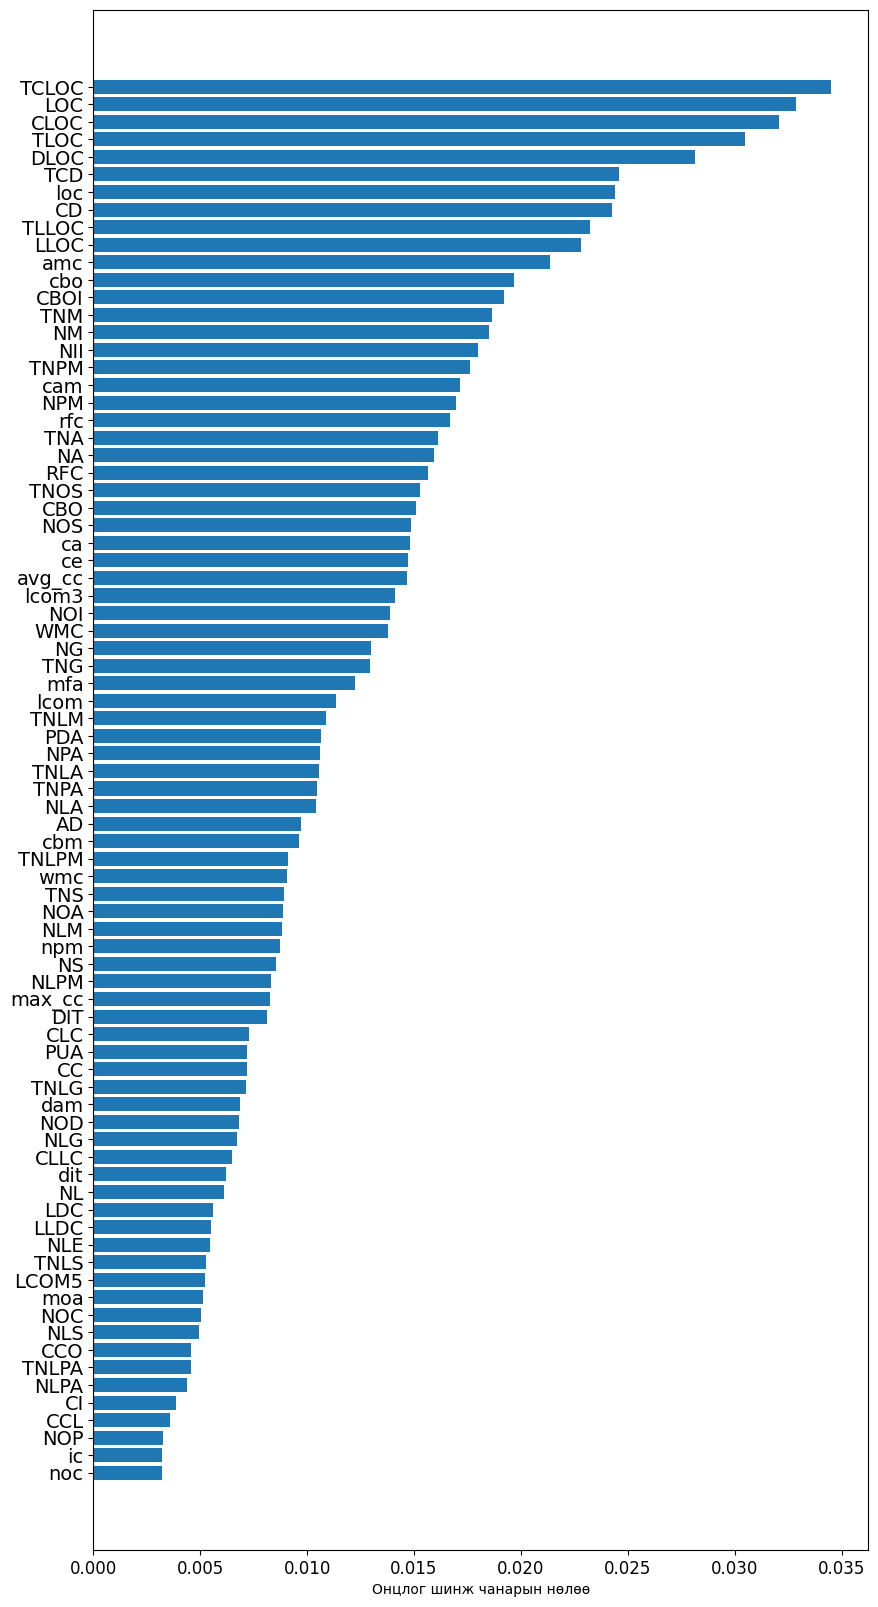

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

sort = model_RF.feature_importances_.argsort()
print (sort)
fig = plt.figure(figsize=(10,20))
plt.barh(data.columns[sort], model_RF.feature_importances_[sort])
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel("Онцлог шинж чанарын нөлөө")

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train_standard, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


In [ ]:
print(grid_search.best_params_)

{'n_neighbors': 11}


In [ ]:
neigh_5 = KNeighborsClassifier(n_neighbors=11)
neigh_5.fit(X_train_standard, y_train)
prediction_5 = neigh_5.predict(X_test_standard)

In [ ]:
evaluation_table = calculate_metrics_add_to_table(prediction_5, 'KNN = 11', evaluation_table)

In [ ]:
print(evaluation_table)

          accuracy  precision    recall  F1 score
nn=5      0.696728   0.667831  0.646712  0.651657
nn=3      0.687967   0.657415  0.644073  0.647982
LR        0.694666   0.681365  0.611571  0.608831
DT        0.712961   0.688054  0.663926  0.669951
RF        0.710126   0.683993  0.664205  0.669683
KNN = 11  0.701108   0.675060  0.642651  0.647874
